In [ ]:
# HYPOTHESIS TESTING

In [ ]:
# Hypothesis 3:
# A male author is more productive than a female author.

In [1]:
# >>> Preparation
# Import categorized 'names_cat.csv'
import pandas

print("Importing names... ")
names = pandas.read_csv("data/names_cat_i3.csv", usecols=["name", "n_publs", "likely_gender", "score", "n_contribs"])

# Setting index & accessing cells: https://pythonhow.com/accessing-dataframe-columns-rows-and-cells/
names = names.set_index("name", drop = False)
print("Names imported. They look like this: {}".format(names[:5]))

Importing names... 
Names imported. They look like this:                                         name likely_gender  n_publs  score  \
name                                                                         
'Maseka Lesaoana            'Maseka Lesaoana        female        2      8   
(David) Jing Dai            (David) Jing Dai          male        1      7   
(Max) Zong-Ming Cheng  (Max) Zong-Ming Cheng          male        2      8   
(Sophy) Shu-Jiun Chen  (Sophy) Shu-Jiun Chen        female        2      7   
(Zhou) Bryan Bai            (Zhou) Bryan Bai          male        2      6   

                       n_contribs  
name                               
'Maseka Lesaoana         0.583333  
(David) Jing Dai         0.200000  
(Max) Zong-Ming Cheng    0.297619  
(Sophy) Shu-Jiun Chen    0.642857  
(Zhou) Bryan Bai         1.000000  


In [2]:
print("Importing publications... ")
cols = [
    'key', 
    'pub_cat',
    'pub_type',
    'title',
    'year',
    'authors',
    'n_authors',
    'n_males',
    'n_females',
    'n_unknown',
    'ratio',
    'n_contribs_females',
    'n_contribs_males',
    'n_contribs_unknown'
]

publs = pandas.read_csv("data/publications_cor3.csv", usecols=cols)

# Setting index & accessing cells: https://pythonhow.com/accessing-dataframe-columns-rows-and-cells/
publs = publs.set_index("key", drop = False)
print("Publications imported. They look like this: {}".format(publs[:5]))

Importing publications... 


C:\Program_Files\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Publications imported. They look like this:                                                                  key  \
key                                                                    
books/acm/0082477                                  books/acm/0082477   
books/acm/Kim95                                      books/acm/Kim95   
books/acm/kim95/AnnevelinkACFHK95  books/acm/kim95/AnnevelinkACFHK95   
books/acm/kim95/Blakeley95                books/acm/kim95/Blakeley95   
books/acm/kim95/BreitbartGS95          books/acm/kim95/BreitbartGS95   

                                        pub_cat pub_type  \
key                                                        
books/acm/0082477                          book      NaN   
books/acm/Kim95                            book      NaN   
books/acm/kim95/AnnevelinkACFHK95  incollection      NaN   
books/acm/kim95/Blakeley95         incollection      NaN   
books/acm/kim95/BreitbartGS95      incollection      NaN   

                              

In [ ]:
# >>> Testing
# A male author is more productive than a female author.

In [6]:
from statistics import mode
import numpy
import matplotlib.pyplot as plt

In [ ]:
'''
On average, an author contributes to: mean=6.139819233233704, median=2.0 and mode=1 publications
On average, an author of unknown gender contributes to: mean=5.371090264478818, median=1.0 and mode=1 publications
On average, a female author contributes to: mean=4.113843465235301, median=1 and mode=1 publications
On average, a male author contributes to: mean=6.402508908684967, median=2 and mode=1 publications
On average, a male author contributes to 1.5563326516408327 times more publications
'''

In [7]:
# Relative values
# Single Contributions
# Finding the mode of a series: https://stackoverflow.com/questions/10797819/finding-the-mode-of-a-list
from statistics import mode

names_max = names[names['score'] >= 5]

n_contribs_mean = names["n_contribs"].mean()
n_contribs_median = numpy.median(names["n_contribs"]) # https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.median.html
n_contribs_mode = mode(names["n_contribs"])

n_contribs_mean_by_gender = names_max.groupby("likely_gender").agg({'n_contribs':'mean'}) # Mean by gender
n_contribs_mean_by_gender["likely_gender"] = n_contribs_mean_by_gender.index.values

n_contribs_median_by_gender = names_max.groupby("likely_gender").agg({'n_contribs':'median'}) # Median by gender
n_contribs_median_by_gender["likely_gender"] = n_contribs_median_by_gender.index.values

n_contribs_mode_by_gender = names_max.groupby("likely_gender").agg({'n_contribs': mode}) # Mode by gender
n_contribs_mode_by_gender["likely_gender"] = n_contribs_mode_by_gender.index.values

n_contribs_f_mean = n_contribs_mean_by_gender["n_contribs"]["female"]
n_contribs_f_median = n_contribs_median_by_gender["n_contribs"]["female"]
n_contribs_f_mode = n_contribs_mode_by_gender["n_contribs"]["female"]

n_contribs_m_mean = n_contribs_mean_by_gender["n_contribs"]["male"]
n_contribs_m_median = n_contribs_median_by_gender["n_contribs"]["male"]
n_contribs_m_mode = n_contribs_mode_by_gender["n_contribs"]["male"]

n_contribs_u_mean = names[names["score"]<5]["n_contribs"].mean() # mean for unknown authors
n_contribs_u_median = names[names["score"]<5]["n_contribs"].median() # median for male authors
n_contribs_u_mode = mode(names[names["score"]<5]["n_contribs"]) # mode for male authors

contribs_fmax = names[(names["likely_gender"] == "female") | (names["score"]<5)]

n_contribs_fmax_mean = contribs_fmax["n_contribs"].mean()
n_contribs_fmax_median = contribs_fmax["n_contribs"].median()
n_contribs_fmax_mode = mode(contribs_fmax["n_contribs"])

print("On average, an author of unknown gender makes: mean={}, median={} and mode={} contributions".format(n_contribs_u_mean, n_contribs_u_median, n_contribs_u_mode))
print("On average, a female author makes: mean={}, median={} and mode={} contributions".format(n_contribs_f_mean, n_contribs_f_median, n_contribs_f_mode))
print("On average, a male author makes: mean={}, median={} and mode={} contributions".format(n_contribs_m_mean, n_contribs_m_median, n_contribs_m_mode))
print("On average, a potentially female author makes: mean={}, median={} and mode={} contributions".format(n_contribs_fmax_mean, n_contribs_fmax_median, n_contribs_fmax_mode))
'''
On average, an author of unknown gender makes: mean=1.701409414493561, median=0.5 and mode=0.3333333333333333 contributions
On average, a female author makes: mean=1.3841903867560146, median=0.5 and mode=0.3333333333333333 contributions
On average, a male author makes: mean=2.239408609184296, median=0.5428571428571429 and mode=0.3333333333333333 contributions
On average, a potentially female author makes: mean=1.663108894471549, median=0.5 and mode=0.3333333333333333 contributions

'''

On average, an author of unknown gender makes: mean=1.701409414493561, median=0.5 and mode=0.3333333333333333 contributions
On average, a female author makes: mean=1.3841903867560146, median=0.5 and mode=0.3333333333333333 contributions
On average, a male author makes: mean=2.239408609184296, median=0.5428571428571429 and mode=0.3333333333333333 contributions
On average, a potentially female author makes: mean=1.663108894471549, median=0.5 and mode=0.3333333333333333 contributions


'\nOn average, an author of unknown gender makes: mean=1.701409414493561, median=0.5 and mode=0.3333333333333333 contributions\nOn average, a female author makes: mean=1.3841903867560146, median=0.5 and mode=0.3333333333333333 contributions\nOn average, a male author makes: mean=2.239408609184296, median=0.5428571428571429 and mode=0.3333333333333333 contributions\nOn average, a potentially female author makes: mean=1.663108894471549, median=0.5 and mode=0.3333333333333333 contributions\n\n'

In [ ]:
# >>> Visualization
# Outliers Included
plt_mean = plt.plot(['male', 'female', 'possibly female', 'unknown'], [n_contribs_mean, n_contribs_mean, n_contribs_mean, n_contribs_mean], 'r--', alpha=0.5, label='Overall Mean')
plt_g_mean = plt.plot(['male','female', 'possibly female', 'unknown'], [n_contribs_m_mean, n_contribs_f_mean, n_contribs_fmax_mean, n_contribs_u_mean], 'rx', label='Mean by Gender')

plt_median = plt.plot(['male', 'female', 'possibly female', 'unknown'],[n_contribs_median, n_contribs_median, n_contribs_median, n_contribs_median], 'b--', alpha=0.5, label='Overall Median')
plt_g_median = plt.plot(['male', 'female', 'possibly female', 'unknown'],[n_contribs_m_median, n_contribs_f_median, n_contribs_fmax_median, n_contribs_u_median], 'bx', label='Median by Gender')

plt_mode = plt.plot(['male', 'female', 'possibly female', 'unknown'],[n_contribs_mode, n_contribs_mode, n_contribs_mode, n_contribs_mode], 'g--', alpha=0.5, label='Overall Mode')
plt_g_mode = plt.plot(['male', 'female', 'possibly female', 'unknown'],[n_contribs_m_mode, n_contribs_f_mode, n_contribs_fmax_mode, n_contribs_u_mode], 'gx', label='Mode by Gender')


plt.xlabel('Gender')
plt.ylabel('Amount of contributions made')

plt.title("How many contributions did authors make on average (by gender)?")

plt.legend(bbox_to_anchor=(1.1, 1))
plt.show()

In [12]:
# >>> See how outliers influence the result
# Outlier calculation
print("Calculating from what point on a team is an outlier, considering its size...")
import numpy as np
lower = np.percentile(names["n_contribs"], 25)
higher = np.percentile(names["n_contribs"], 75)
interquart_range = higher - lower
outer_fence = higher + interquart_range * 3
print("The outer fence is {}".format(outer_fence))

Calculating from what point on a team is an outlier, considering its size...
The outer fence is 4.554761904761904


In [13]:
regular_authors = names[names["n_contribs"] <= outer_fence]
regular_authors_max = regular_authors[regular_authors["score"] >= 5]

In [14]:
n_contribs_mean = regular_authors["n_contribs"].mean()
n_contribs_median = np.median(regular_authors["n_contribs"]) # https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.median.html
n_contribs_mode = mode(regular_authors["n_contribs"])

n_contribs_mean_by_gender = regular_authors_max.groupby("likely_gender").agg({'n_contribs':'mean'}) # Mean by gender
n_contribs_mean_by_gender["likely_gender"] = n_contribs_mean_by_gender.index.values

n_contribs_median_by_gender = regular_authors_max.groupby("likely_gender").agg({'n_contribs':'median'}) # Median by gender
n_contribs_median_by_gender["likely_gender"] = n_contribs_median_by_gender.index.values

n_contribs_mode_by_gender = regular_authors_max.groupby("likely_gender").agg({'n_contribs': mode}) # Mode by gender
n_contribs_mode_by_gender["likely_gender"] = n_contribs_mode_by_gender.index.values

n_contribs_f_mean = n_contribs_mean_by_gender["n_contribs"]["female"]
n_contribs_f_median = n_contribs_median_by_gender["n_contribs"]["female"]
n_contribs_f_mode = n_contribs_mode_by_gender["n_contribs"]["female"]

n_contribs_m_mean = n_contribs_mean_by_gender["n_contribs"]["male"]
n_contribs_m_median = n_contribs_median_by_gender["n_contribs"]["male"]
n_contribs_m_mode = n_contribs_mode_by_gender["n_contribs"]["male"]

n_contribs_u_mean = regular_authors[regular_authors["score"]<5]["n_contribs"].mean() # mean for unknown authors
n_contribs_u_median = regular_authors[regular_authors["score"]<5]["n_contribs"].median() # median for male authors
n_contribs_u_mode = mode(regular_authors[regular_authors["score"]<5]["n_contribs"]) # mode for male authors

contribs_fmax = regular_authors[(regular_authors["likely_gender"] == "female") | (regular_authors["score"]<5)]

n_contribs_fmax_mean = contribs_fmax["n_contribs"].mean()
n_contribs_fmax_median = contribs_fmax["n_contribs"].median()
n_contribs_fmax_mode = mode(contribs_fmax["n_contribs"])

print("On average, an author of unknown gender makes: mean={}, median={} and mode={} contributions".format(n_contribs_u_mean, n_contribs_u_median, n_contribs_u_mode))
print("On average, a female author makes: mean={}, median={} and mode={} contributions".format(n_contribs_f_mean, n_contribs_f_median, n_contribs_f_mode))
print("On average, a male author makes: mean={}, median={} and mode={} contributions".format(n_contribs_m_mean, n_contribs_m_median, n_contribs_m_mode))
print("On average, a potentially female author makes: mean={}, median={} and mode={} contributions".format(n_contribs_fmax_mean, n_contribs_fmax_median, n_contribs_fmax_mode))

'''
On average, an author of unknown gender makes: mean=0.7531417121859828, median=0.45 and mode=0.3333333333333333 contributions
On average, a female author makes: mean=0.7289518925650421, median=0.4166666666666666 and mode=0.3333333333333333 contributions
On average, a male author makes: mean=0.8831775973120519, median=0.5 and mode=0.3333333333333333 contributions
On average, a potentially female author makes: mean=0.7501832072327901, median=0.45 and mode=0.3333333333333333 contributions'''

On average, an author of unknown gender makes: mean=0.7531417121859828, median=0.45 and mode=0.3333333333333333 contributions
On average, a female author makes: mean=0.7289518925650421, median=0.4166666666666666 and mode=0.3333333333333333 contributions
On average, a male author makes: mean=0.8831775973120519, median=0.5 and mode=0.3333333333333333 contributions
On average, a potentially female author makes: mean=0.7501832072327901, median=0.45 and mode=0.3333333333333333 contributions


'\nOn average, an author of unknown gender makes: mean=0.7531417121859828, median=0.45 and mode=0.3333333333333333 contributions\nOn average, a female author makes: mean=0.7289518925650421, median=0.4166666666666666 and mode=0.3333333333333333 contributions\nOn average, a male author makes: mean=0.8831775973120519, median=0.5 and mode=0.3333333333333333 contributions\nOn average, a potentially female author makes: mean=0.7501832072327901, median=0.45 and mode=0.3333333333333333 contributions'

In [15]:
n_contribs_var_by_gender = regular_authors.groupby("likely_gender").agg({'n_contribs':'var'}) # Mean by gender
n_contribs_var_by_gender["likely_gender"] = n_contribs_var_by_gender.index.values

likely_gender
female    [[AxesSubplot(0.125,0.551739;0.336957x0.328261...
male      [[AxesSubplot(0.125,0.551739;0.336957x0.328261...
dtype: object

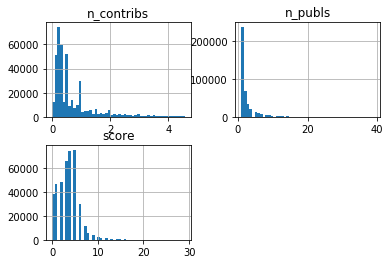

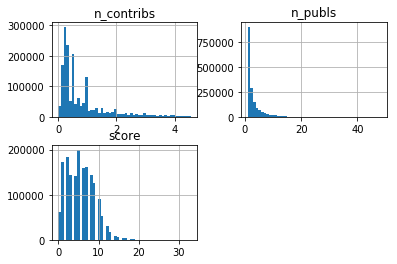

In [21]:
regular_authors.groupby("likely_gender").hist(bins=50)

In [34]:
from scipy.stats import skew
f = regular_authors[regular_authors["likely_gender"] == "female"]["n_contribs"]
m = regular_authors[regular_authors["likely_gender"] == "male"]["n_contribs"]

In [35]:
skew(f)

2.239523776573972

In [36]:
skew(m)

1.9773100008576092

In [37]:
from scipy.stats import mannwhitneyu

In [48]:
mannwhitneyu(m, f)

MannwhitneyuResult(statistic=325564646584.5, pvalue=0.0)

In [46]:
u_2 = len(f) * len(m) / 2 
# https://www.graphpad.com/guides/prism/7/statistics/index.htm?how_the_mann-whitney_test_works.htm
# The largest possible value is half the product of the number of values in group A times the number of values in group B.

In [47]:
u_2

351059696854.0

In [ ]:
# Visualize
plt_mean = plt.plot(['male', 'female', 'possibly female', 'unknown'], [n_contribs_mean, n_contribs_mean, n_contribs_mean, n_contribs_mean], 'r--', alpha=0.5, label='Overall Mean')
plt_g_mean = plt.plot(['male','female', 'possibly female', 'unknown'], [n_contribs_m_mean, n_contribs_f_mean, n_contribs_fmax_mean, n_contribs_u_mean], 'rx', label='Mean by Gender')

plt_median = plt.plot(['male', 'female', 'possibly female', 'unknown'],[n_contribs_median, n_contribs_median, n_contribs_median, n_contribs_median], 'b--', alpha=0.5, label='Overall Median')
plt_g_median = plt.plot(['male', 'female', 'possibly female', 'unknown'],[n_contribs_m_median, n_contribs_f_median, n_contribs_fmax_median, n_contribs_u_median], 'bx', label='Median by Gender')

plt_mode = plt.plot(['male', 'female', 'possibly female', 'unknown'],[n_contribs_mode, n_contribs_mode, n_contribs_mode, n_contribs_mode], 'g--', alpha=0.5, label='Overall Mode')
plt_g_mode = plt.plot(['male', 'female', 'possibly female', 'unknown'],[n_contribs_m_mode, n_contribs_f_mode, n_contribs_fmax_mode,n_contribs_u_mode], 'gx', label='Mode by Gender')


plt.xlabel('Gender')
plt.ylabel('Amount of contributions made')

plt.title("How many contributions did authors make on average (by gender)?")

plt.legend(bbox_to_anchor=(1.1, 1))
plt.show()

In [ ]:
# >>> Evaluation
# Hypothesis 3 is correct. A male author is more productive than a female author.